# EEP 153 Project 2: Group James Lind

### Minimum Cost Diet

**Topic:**
Investigate the minimum cost diet for Berkeley studens living in dormitories who rely on meal plans and Trader Joe's frozen food for daily nutrient intake.

**Objective:**
1. Find out mimimum requirement of daily nutrient intake for college students 
2. Collect data from Trader Joe's webiste and create a dataframe with 50 unique forzen foods and their respective price, quantities and nutrients 
3. Solve the minimum cost diet probelm for Berkeley dormitories students; create a frozen food receipt and analyze its limitations


6. [[B] Recipe for the minimum cost meal]

7. [[C] Sensitivity of Solution]

### Libraries Import

In [1]:
!pip install -r requirements.txt
!pip install eep153_tools

In [2]:
import pandas as pd
import numpy as np
import fooddatacentral as fdc
import regex as re
import matplotlib.pyplot as plt
from eep153_tools.sheets import read_sheets

from scipy.optimize import linprog as lp
import warnings
apikey = "erxlvhinjtIFU2KUGhLfPyBDw8qgaK8FKILj45fk"

### [A] Description of Population of Interest  <a name='pop'></a>
We are focusing on undergraduate Berkeley students who are living in the dorms and on a basic meal plan. We assume that they are on a diet with only meal plans and Trader Joe's forzen food.

### [A] Dietary Reference Intakes
A function that takes in characteristics of a person (age, sex) and return a pandas.Series of Dietary Reference Intakes of nutrients appropriate for Berkeley undergraduate students.

In [3]:
diet_minimum = pd.read_csv('diet_minimums.txt').set_index('Nutrition').iloc[:,2:]
diet_maximum = pd.read_csv('diet_maximums.csv').set_index('Nutrition').iloc[:,1:]
diet_maximum 

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
"Sodium, Na",1500,1900,1900,2200,2200,2300,2300,2300,2300,2300,2300,2300,2300
Energy,2500,2500,2500,2800,3000,3100,3100,3100,3100,3100,3100,3100,3100


In [4]:
diet_minimum

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [5]:
transformed_age_sex_groups = []
transformed_age_sex_groups += [diet_minimum.columns[0]]
for col in diet_minimum.columns[1:]:
    element = []
    if col[0] == 'F':
        element += ['female']
    else:
        element += ['male']
    ages = re.findall('[0-9]+', col)
    if len(ages) == 2:
        element += range(int(ages[0]),int(ages[1])+1)
    else:
        element += range(int(ages[0]),101)
    transformed_age_sex_groups += [element]   

In [6]:
def nutrient_intake(age, sex, data):
    if age >= 1 and age <= 3:
        return data.iloc[:,0]
    for i in range(len(transformed_age_sex_groups)):
        if (sex.lower() in transformed_age_sex_groups[i]) and (age in transformed_age_sex_groups[i]):
            return data.iloc[:,i]

#### Example: the minimum nutrient intake for a 90-year-old female

In [7]:
female_90 = nutrient_intake(90, 'female', diet_minimum)        
female_90

Nutrition
Energy                            1600.0
Protein                             46.0
Fiber, total dietary                22.4
Folate, DFE                        400.0
Calcium, Ca                       1200.0
Carbohydrate, by difference        130.0
Iron, Fe                             8.0
Magnesium, Mg                      320.0
Niacin                              14.0
Phosphorus, P                      700.0
Potassium, K                      4700.0
Riboflavin                           1.1
Thiamin                              1.1
Vitamin A, RAE                     700.0
Vitamin B-12                         2.4
Vitamin B-6                          1.5
Vitamin C, total ascorbic acid      75.0
Vitamin E (alpha-tocopherol)        15.0
Vitamin K (phylloquinone)           90.0
Zinc, Zn                             8.0
Name: F 51+, dtype: float64

#### Example: the maximum nutrient intake for a 3-year-old male

In [8]:
male_3 = nutrient_intake(3, 'male',diet_maximum)   
male_3

Nutrition
Sodium, Na    1500
Energy        2500
Name: C 1-3, dtype: int64

### [A] Data on prices for different foods

#### Self-collected data on Trader Joe's frozen food

In [9]:
food_data = pd.read_csv("Trader Joes Data.csv").set_index("Food Item")
food_data.fillna(0)


,Price of Item (USD),Number of Servings,Energy,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholestrol (mg),"Sodium, Na","Carbohydrate, by difference","Fiber, total dietary",Total Sugars (g),Added Sugars (g),Protein,Vitamin D (mcg),"Calcium, Ca","Iron, Fe","Potassium, K"
Food Item,,,,,,,,,,,,,,,,,
Vegetable Fried Rice,2.99,3.0,230,2.5,0.0,0.0,0,510,45,3,3,1,6,0.0,0,0.9,190
Korean Beefless Bulgogi,4.49,3.0,230,11.0,2.0,0.0,0,580,15,5,6,6,16,0.0,60,5.3,190
Cheese & Green Chile Tamales,3.79,2.0,290,16.0,6.0,0.0,20,610,28,2,2,0,8,0.1,200,1.2,200
Stir Fried Garlicky Cabbage,3.49,2.0,130,9.0,2.0,0.0,0,620,9,4,5,1,3,0.0,50,0.5,350
Vegetarian Meatless Cheeseburger Pizza,5.99,3.0,340,15.0,5.0,0.0,20,790,37,3,4,0,14,0.0,190,2.4,310
Roasted Garlic & Pesto Pizza with Deep Fried Crust,5.99,3.0,430,20.0,9.0,0.0,25,900,43,3,1,0,17,0.3,260,1.2,170
Chickenless Crispy Tenders,3.79,3.0,170,7.0,0.5,0.0,0,380,14,4,1,1,13,0.0,30,1.4,270
Bulgogi Beef Fried Rice with Kimchi,5.49,1.0,400,10.0,1.5,0.0,20,1150,60,3,7,5,11,0.0,50,1.5,300
Bulgur Pilaf with Butternut Squash & Feta Cheese,3.49,3.5,200,10.0,3.0,0.0,10,380,20,2,3,0,6,0.0,40,1.0,250


In [10]:
p = food_data["Price of Item (USD)"]/food_data['Number of Servings']
p

Food Item
Vegetable Fried Rice                                  0.996667
Korean Beefless Bulgogi                               1.496667
Cheese & Green Chile Tamales                          1.895000
Stir Fried Garlicky Cabbage                           1.745000
Vegetarian Meatless Cheeseburger Pizza                1.996667
Roasted Garlic & Pesto Pizza with Deep Fried Crust    1.996667
Chickenless Crispy Tenders                            1.263333
Bulgogi Beef Fried Rice with Kimchi                   5.490000
Bulgur Pilaf with Butternut Squash & Feta Cheese      0.997143
Chicken Burrito Bowl                                  3.490000
Italian Tomato & Red Onion Focaccia                   1.330000
Cuban Style Citrus Garlic Bowl                        3.990000
Hashbrowns                                            0.249000
Pão D'Água Portuguese Rolls                           0.572500
Layered Beef Tostada                                  3.990000
Mini Chicken Tacos                           

## [A] Nutritional content of different foods

In [11]:
# Due to mismatch of nutrients between requirement.txt and the nutrients' data available, 
# we dropped some of the nutrients' requirements
diet_minimum = diet_minimum.drop(['Folate, DFE', 'Magnesium, Mg', 'Niacin', 'Phosphorus, P', 'Riboflavin', 'Thiamin', 'Vitamin A, RAE', 'Vitamin B-12', 'Vitamin B-6', 'Vitamin C, total ascorbic acid', 'Vitamin E (alpha-tocopherol)', 'Vitamin K (phylloquinone)', 'Zinc, Zn'])

In [12]:
D = food_data.drop(["Number of Servings","Price of Item (USD)"], axis = 1)
D = D.T
D

Food Item,Vegetable Fried Rice,Korean Beefless Bulgogi,Cheese & Green Chile Tamales,Stir Fried Garlicky Cabbage,Vegetarian Meatless Cheeseburger Pizza,Roasted Garlic & Pesto Pizza with Deep Fried Crust,Chickenless Crispy Tenders,Bulgogi Beef Fried Rice with Kimchi,Bulgur Pilaf with Butternut Squash & Feta Cheese,Chicken Burrito Bowl,...,Cauliflower Gnocchi,Gluten Free Mac & Cheese,Steamed Pork & Ginger Soup Dumplings,Sriracha Shrimp Bowl,Chicken-less Mandarin Orange Morsels,Pizza Parlano,Outside-In Stuffed Gnocchi,Cuban Style Citrus Garlic Bowl,Honey Walnut Shrimp,Chipotle Vegetable Quesadillas
Energy,230.0,230.0,290.0,130.0,340.0,430.0,170.0,400.0,200.0,370.0,...,140.0,300.0,270.0,320.0,270.0,330.0,180.0,400.0,500.0,360.0
Total Fat (g),2.5,11.0,16.0,9.0,15.0,20.0,7.0,10.0,10.0,10.0,...,3.0,10.0,10.0,8.0,8.0,16.0,3.5,18.0,28.0,13.0
Saturated Fat (g),0.0,2.0,6.0,2.0,5.0,9.0,0.5,1.5,3.0,4.5,...,0.5,5.0,3.0,1.5,0.5,6.0,2.0,2.0,8.0,5.0
Trans Fat (g),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cholestrol (mg),0.0,0.0,20.0,0.0,20.0,25.0,0.0,20.0,10.0,55.0,...,0.0,30.0,40.0,35.0,0.0,30.0,30.0,45.0,125.0,30.0
"Sodium, Na",510.0,580.0,610.0,620.0,790.0,900.0,380.0,1150.0,380.0,630.0,...,460.0,600.0,560.0,690.0,720.0,620.0,680.0,540.0,670.0,510.0
"Carbohydrate, by difference",45.0,15.0,28.0,9.0,37.0,43.0,14.0,60.0,20.0,51.0,...,22.0,41.0,30.0,47.0,29.0,33.0,29.0,44.0,22.0,47.0
"Fiber, total dietary",3.0,5.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,9.0,...,6.0,1.0,1.0,1.0,7.0,1.0,3.0,1.0,2.0,4.0
Total Sugars (g),3.0,6.0,2.0,5.0,4.0,1.0,1.0,7.0,3.0,2.0,...,1.0,3.0,3.0,3.0,15.0,5.0,6.0,13.0,26.0,3.0
Added Sugars (g),1.0,6.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,2.0,2.0,15.0,13.0,0.0,3.0,23.0,2.0


## [A] Solution

In [13]:
Amin = D.loc[diet_minimum.index]
Amax = D.loc[diet_maximum.index]
A = pd.concat([Amin, -Amax])
A

Food Item,Vegetable Fried Rice,Korean Beefless Bulgogi,Cheese & Green Chile Tamales,Stir Fried Garlicky Cabbage,Vegetarian Meatless Cheeseburger Pizza,Roasted Garlic & Pesto Pizza with Deep Fried Crust,Chickenless Crispy Tenders,Bulgogi Beef Fried Rice with Kimchi,Bulgur Pilaf with Butternut Squash & Feta Cheese,Chicken Burrito Bowl,...,Cauliflower Gnocchi,Gluten Free Mac & Cheese,Steamed Pork & Ginger Soup Dumplings,Sriracha Shrimp Bowl,Chicken-less Mandarin Orange Morsels,Pizza Parlano,Outside-In Stuffed Gnocchi,Cuban Style Citrus Garlic Bowl,Honey Walnut Shrimp,Chipotle Vegetable Quesadillas
Nutrition,,,,,,,,,,,,,,,,,,,,,
Energy,230.0,230.0,290.0,130.0,340.0,430.0,170.0,400.0,200.0,370.0,...,140.0,300.0,270.0,320.0,270.0,330.0,180.0,400.0,500.0,360.0
Protein,6.0,16.0,8.0,3.0,14.0,17.0,13.0,11.0,6.0,22.0,...,2.0,11.0,14.0,15.0,20.0,0.0,6.0,16.0,24.0,15.0
"Fiber, total dietary",3.0,5.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,9.0,...,6.0,1.0,1.0,1.0,7.0,1.0,3.0,1.0,2.0,4.0
"Calcium, Ca",0.0,60.0,200.0,50.0,190.0,260.0,30.0,50.0,40.0,130.0,...,40.0,140.0,20.0,220.0,50.0,0.0,60.0,30.0,63.0,290.0
"Carbohydrate, by difference",45.0,15.0,28.0,9.0,37.0,43.0,14.0,60.0,20.0,51.0,...,22.0,41.0,30.0,47.0,29.0,33.0,29.0,44.0,22.0,47.0
"Iron, Fe",0.9,5.3,1.2,0.5,2.4,1.2,1.4,1.5,1.0,2.6,...,0.9,0.7,1.9,1.6,2.0,0.0,0.5,2.3,0.0,2.0
"Potassium, K",190.0,190.0,200.0,350.0,310.0,170.0,270.0,300.0,250.0,690.0,...,210.0,80.0,190.0,340.0,400.0,0.0,390.0,300.0,141.0,250.0
"Sodium, Na",-510.0,-580.0,-610.0,-620.0,-790.0,-900.0,-380.0,-1150.0,-380.0,-630.0,...,-460.0,-600.0,-560.0,-690.0,-720.0,-620.0,-680.0,-540.0,-670.0,-510.0
Energy,-230.0,-230.0,-290.0,-130.0,-340.0,-430.0,-170.0,-400.0,-200.0,-370.0,...,-140.0,-300.0,-270.0,-320.0,-270.0,-330.0,-180.0,-400.0,-500.0,-360.0


In [14]:
b = pd.concat([diet_minimum,-diet_maximum])
b

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Potassium, K",3000.0,3800.0,3800.0,4500.0,4500.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0
"Sodium, Na",-1500.0,-1900.0,-1900.0,-2200.0,-2200.0,-2300.0,-2300.0,-2300.0,-2300.0,-2300.0,-2300.0,-2300.0,-2300.0
Energy,-2500.0,-2500.0,-2500.0,-2800.0,-3000.0,-3100.0,-3100.0,-3100.0,-3100.0,-3100.0,-3100.0,-3100.0,-3100.0


In [15]:
# A function that takes in FoodNutrients (A); price (p); DailyNutrients (b); and group of interests
# groups of interest must come from b.columns
def solve_subsistence_problem(FoodNutrients, price, DailyNutrients, group, tol=1e-5):
    result = lp(price, -FoodNutrients, -DailyNutrients[group],method='interior-point')
    return result    

### Solution 1: Female 19-30, only eating Trader Joe's Frozen Food

#### *1) Without calorie and sodium restriction*

In [16]:
group = "F 19-30"
tol=1e-5
result = solve_subsistence_problem(Amin, p, diet_minimum, group, tol)
print(result.message)
print(f"Cost of diet for {group} is ${result.fun:.2f} per day.")
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in serving):")
print(diet[diet >= tol]) 

tab = pd.DataFrame({"Outcome":np.abs(Amin).dot(diet),"Recommendation":np.abs(diet_minimum[group])})
print("\nWith the following nutritional outcomes of interest:")
tab

Optimization terminated successfully.
Cost of diet for F 19-30 is $10.45 per day.

You'll be eating (in serving):
Food Item
Korean Beefless Bulgogi                 1.546053
Hashbrowns                             18.930921
Southwest Style Chicken Quesadillas     1.595395
dtype: float64

With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,3281.414506,2000.0
Protein,80.361842,46.0
"Fiber, total dietary",31.447369,28.0
"Calcium, Ca",1000.000001,1000.0
"Carbohydrate, by difference",364.588821,130.0
"Iron, Fe",18.000000,18.0
"Potassium, K",4700.000063,4700.0


#### *2) With only Energy, Protein, Fiber, Sodium Requirements* 

In [17]:
A_limit = A.loc[["Energy","Protein","Fiber, total dietary","Sodium, Na"]]
b_limit = b.loc[["Energy","Protein","Fiber, total dietary","Sodium, Na"]]
result = solve_subsistence_problem(A_limit, p, b_limit, group, tol)
print(result.message)
print(f"Cost of diet for {group} is ${result.fun:.2f} per day.")
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in serving):")
print(diet[diet >= tol]) 

tab = pd.DataFrame({"Outcome":np.abs(A_limit).dot(diet),"Recommendation":np.abs(b_limit[group])})
print("\nWith the following nutritional outcomes of interest:")
tab

Optimization terminated successfully.
Cost of diet for F 19-30 is $7.94 per day.

You'll be eating (in serving):
Food Item
Hashbrowns                    4.285406
Mandarin Orange Chicken       2.225441
Mexican Style Roasted Corn    4.297824
dtype: float64

With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,2000.000019,2000.0
Energy,2000.000019,3100.0
Protein,72.508861,46.0
"Fiber, total dietary",28.000001,28.0
"Sodium, Na",2299.999911,2300.0


### Solution 2: Male 19-30, only eating Trader Joe's Frozen Food

#### *1) Without calorie and sodium restriction*

In [18]:
group = "M 19-30"
result = solve_subsistence_problem(Amin, p, diet_minimum, group, tol)
print(result.message)
print(f"Cost of diet for {group} is ${result.fun:.2f} per day.")
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in serving):")
print(diet[diet >= tol]) 

tab = pd.DataFrame({"Outcome":np.abs(Amin).dot(diet),"Recommendation":np.abs(diet_minimum[group])})
print("\nWith the following nutritional outcomes of interest:")
tab

Optimization terminated successfully.
Cost of diet for M 19-30 is $10.14 per day.

You'll be eating (in serving):
Food Item
Hashbrowns                             18.542764
Mini Beef Tacos                         2.033821
Southwest Style Chicken Quesadillas     1.629377
dtype: float64

With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,3442.307857,2400.0
Protein,78.390461,56.0
"Fiber, total dietary",33.600000,33.6
"Calcium, Ca",1000.000000,1000.0
"Carbohydrate, by difference",383.576911,130.0
"Iron, Fe",11.935436,8.0
"Potassium, K",4700.000001,4700.0


#### *It is interesting to see that the cost of males is lower than females. So we investigated their required nutrients' intakes and found that women require higher Iron intake. This is the reason why, without calories and sodium restriction, female's minimum cost diet requires more food.*

In [19]:
nutrient_intake(23, 'male',diet_minimum)

Nutrition
Energy                         2400.0
Protein                          56.0
Fiber, total dietary             33.6
Calcium, Ca                    1000.0
Carbohydrate, by difference     130.0
Iron, Fe                          8.0
Potassium, K                   4700.0
Name: M 19-30, dtype: float64

In [20]:
nutrient_intake(23, 'female',diet_minimum)

Nutrition
Energy                         2000.0
Protein                          46.0
Fiber, total dietary             28.0
Calcium, Ca                    1000.0
Carbohydrate, by difference     130.0
Iron, Fe                         18.0
Potassium, K                   4700.0
Name: F 19-30, dtype: float64

#### *2) With only Energy, Protein, Fiber, Sodium Requirements* 

In [21]:
A_limit = A.loc[["Energy","Protein","Fiber, total dietary","Sodium, Na"]]
b_limit = b.loc[["Energy","Protein","Fiber, total dietary","Sodium, Na"]]
result = solve_subsistence_problem(A_limit, p, b_limit, group, tol)
print(result.message)
print(f"Cost of diet for {group} is ${result.fun:.2f} per day.")
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in serving):")
print(diet[diet >= tol]) 

tab = pd.DataFrame({"Outcome":np.abs(A_limit).dot(diet),"Recommendation":np.abs(b_limit[group])})
print("\nWith the following nutritional outcomes of interest:")
tab

Optimization terminated successfully.
Cost of diet for M 19-30 is $10.20 per day.

You'll be eating (in serving):
Food Item
Hashbrowns                    1.765046
Mandarin Orange Chicken       3.669493
Mexican Style Roasted Corn    5.633092
dtype: float64

With the following nutritional outcomes of interest:


,Outcome,Recommendation
Nutrition,,
Energy,2400.000000,2400.0
Energy,2400.000000,3100.0
Protein,106.989869,56.0
"Fiber, total dietary",33.600000,33.6
"Sodium, Na",2299.999999,2300.0


In [22]:
data = np.array([(10.45,10.14),(7.94,10.2)], dtype = 'f')
minimum_cost = pd.DataFrame(data, columns = ["F 19-30","M 19-30"])
minimum_cost["conditions"] = ["Without calories & Sodium Restriction","Only Energy, Protein, Fiber, and Sodium Requirements"]
minimum_cost = minimum_cost.set_index("conditions")
minimum_cost = minimum_cost.round(decimals = 2)
print("Daily Minimum Meal Cost $ (with only Trader Joe's Frozen Food)")
minimum_cost

Daily Minimum Meal Cost $ (with only Trader Joe's Frozen Food)


,F 19-30,M 19-30
conditions,,
Without calories & Sodium Restriction,10.45,10.14
"Only Energy, Protein, Fiber, and Sodium Requirements",7.94,10.20


In [23]:
data = np.array([(10.45/3,10.14/3),(7.94/3,10.2/3)], dtype = 'f')
minimum_cost_2 = pd.DataFrame(data, columns = ["F 19-30","M 19-30"])
minimum_cost_2["conditions"] = ["Without calories & Sodium Restriction","Only Energy, Protein, Fiber, and Sodium Requirements"]
minimum_cost_2 = minimum_cost_2.set_index("conditions")
minimum_cost_2 = minimum_cost_2.round(decimals = 2)
print("Daily Minimum Meal Cost $ (with 1 meal from Trader Joe's Frozen Food)")
minimum_cost_2

Daily Minimum Meal Cost $ (with 1 meal from Trader Joe's Frozen Food)


,F 19-30,M 19-30
conditions,,
Without calories & Sodium Restriction,3.48,3.38
"Only Energy, Protein, Fiber, and Sodium Requirements",2.65,3.40


### [C] Sensitivity of Solution

#### *Given in previous solution, hashbrowns has been the major component of our minimum cost diet. In this section, we will investigate how the changes of prices in hashbrown affect the composition of cost minimum diet for Female 19-30.*

In [24]:
group = "F 19-30"
q = np.zeros((9,50))
i = 0
for x in [0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31]:
    p["Hashbrowns"] = x
    q[i] = solve_subsistence_problem(A_limit, p, b_limit, group, tol=0).x
    i += 1 

In [25]:
quantity_sensitive = pd.DataFrame(q, columns = A.columns)
quantity_sensitive["Hashbrown price"] = [0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31]
quantity_sensitive = quantity_sensitive.set_index(["Hashbrown price"])
quantity_sensitive

Food Item,Vegetable Fried Rice,Korean Beefless Bulgogi,Cheese & Green Chile Tamales,Stir Fried Garlicky Cabbage,Vegetarian Meatless Cheeseburger Pizza,Roasted Garlic & Pesto Pizza with Deep Fried Crust,Chickenless Crispy Tenders,Bulgogi Beef Fried Rice with Kimchi,Bulgur Pilaf with Butternut Squash & Feta Cheese,Chicken Burrito Bowl,...,Cauliflower Gnocchi,Gluten Free Mac & Cheese,Steamed Pork & Ginger Soup Dumplings,Sriracha Shrimp Bowl,Chicken-less Mandarin Orange Morsels,Pizza Parlano,Outside-In Stuffed Gnocchi,Cuban Style Citrus Garlic Bowl,Honey Walnut Shrimp,Chipotle Vegetable Quesadillas
Hashbrown price,,,,,,,,,,,,,,,,,,,,,
0.15,3.754970e-10,6.421126e-11,3.049096e-10,1.076814e-10,1.769973e-10,1.694739e-10,1.721178e-10,1.069652e-10,5.146892e-10,1.980210e-10,...,1.768159e-10,3.375435e-10,2.450299e-10,2.170020e-10,8.622131e-12,8.816743e-10,1.025162e-10,3.371141e-10,4.172677e-10,5.638754e-10
0.17,4.739955e-10,7.060473e-11,3.211451e-10,1.179498e-10,1.887255e-10,1.892841e-10,1.854067e-10,1.202896e-10,5.685796e-10,2.069811e-10,...,2.027096e-10,3.552339e-10,2.578127e-10,2.270816e-10,8.803065e-12,9.841853e-10,1.211800e-10,3.515317e-10,4.464749e-10,5.989874e-10
0.19,6.134449e-10,9.287236e-11,4.293725e-10,1.806748e-10,2.534314e-10,2.716969e-10,2.577268e-10,1.966544e-10,7.818900e-10,2.831567e-10,...,2.999630e-10,4.773999e-10,3.489896e-10,3.034557e-10,9.277618e-12,1.225335e-09,1.589107e-10,4.614796e-10,6.314455e-10,7.930628e-10
0.21,7.741999e-10,1.090260e-10,6.269487e-10,2.672743e-10,3.689682e-10,3.878120e-10,3.080556e-10,3.386038e-10,1.118482e-09,4.252206e-10,...,3.498102e-10,7.005643e-10,5.153229e-10,4.427065e-10,1.004634e-11,1.608254e-09,1.940582e-10,6.588924e-10,9.713002e-10,1.144533e-09
0.23,8.980235e-10,7.888698e-11,1.041831e-09,3.718993e-10,6.061376e-10,5.299319e-10,1.921002e-10,6.441333e-10,1.683162e-09,7.274339e-10,...,1.921259e-11,1.169029e-09,8.662901e-10,7.352948e-10,2.020125e-11,2.343005e-09,1.797589e-10,1.071072e-09,1.697064e-09,1.879574e-09
0.25,3.568153e-13,1.561630e-13,3.797828e-13,2.449301e-13,2.605312e-13,2.657340e-13,2.725862e-13,2.842992e-13,7.303514e-13,2.763122e-13,...,1.170981e-14,4.193161e-13,2.903526e-13,2.441743e-13,1.263244e-13,7.177420e-13,1.416482e-13,3.299418e-13,5.936926e-13,6.927135e-13
0.27,1.132265e-09,6.169224e-10,3.743418e-10,5.930639e-10,3.621826e-10,6.050553e-10,1.172953e-09,3.875756e-10,1.284066e-09,3.009679e-10,...,5.769638e-10,4.000426e-10,2.709460e-10,2.131325e-10,4.416492e-10,7.662141e-10,5.237161e-10,2.766895e-10,6.093280e-10,7.455733e-10
0.29,3.710399e-11,1.853231e-11,1.693211e-11,1.784818e-11,1.429685e-11,1.626216e-11,3.220031e-11,1.697939e-11,4.063592e-11,1.417188e-11,...,1.082867e-12,1.845408e-11,1.364825e-11,1.077000e-11,1.558481e-11,2.970232e-11,1.425029e-11,1.452221e-11,3.004062e-11,3.268968e-11
0.31,4.263773e-11,2.089009e-11,1.864990e-11,1.981573e-11,1.585445e-11,1.829760e-11,3.590720e-11,1.869439e-11,4.546055e-11,1.561189e-11,...,1.441289e-12,2.031228e-11,1.507786e-11,1.187838e-11,1.757412e-11,3.320601e-11,1.624664e-11,1.610743e-11,3.322917e-11,3.610960e-11


In [26]:
for col in quantity_sensitive.columns:
    small = True
    for x in quantity_sensitive[col]:
        if x > 0.1:
            small = False
    if small == True:
        quantity_sensitive = quantity_sensitive.drop(columns = col)
quantity_sensitive

Food Item,Hashbrowns,Mini Beef Tacos,Mandarin Orange Chicken,Mexican Style Roasted Corn
Hashbrown price,,,,
0.15,4.285419e+00,4.660403e-09,2.225440,4.297828
0.17,4.285419e+00,8.744787e-09,2.225440,4.297828
0.19,4.285419e+00,1.696839e-08,2.225440,4.297828
0.21,4.285419e+00,3.814691e-08,2.225440,4.297828
0.23,4.285418e+00,1.426116e-07,2.225440,4.297828
0.25,4.285419e+00,4.185542e-10,2.225440,4.297828
0.27,1.682780e-06,2.356218e+00,2.746268,2.694528
0.29,1.758869e-08,2.356219e+00,2.746269,2.694527
0.31,1.008606e-08,2.356219e+00,2.746269,2.694527


Text(0.5, 1.0, 'Change in composition of diet with change in prices of hashbrown')

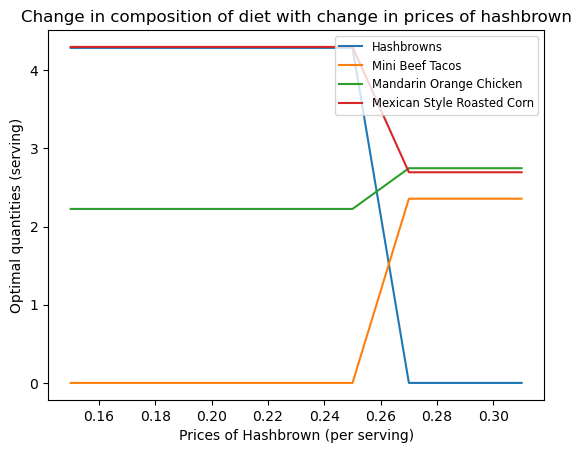

In [27]:
for col in quantity_sensitive.columns:
    plt.plot(quantity_sensitive.index,quantity_sensitive[col], label = col)
    plt.legend(fontsize = 'small')
plt.xlabel("Prices of Hashbrown (per serving)")
plt.ylabel("Optimal quantities (serving)")
plt.title("Change in composition of diet with change in prices of hashbrown")